# TP Final - Análisis de Series Temporales - Especialización en Inteligencia Artificial

### A partir de las transformaciones propuestas ajustar distitos **modelos (S)ARIMA**: Extraer orden, parámetros, coeficientes numéricos y análisis de la bondad del modelo.

## Weekly fuel prices in Italy:

Weekly fuel prices in Italy from 03/2005 to 08/2021. Extracted from the Italy Government website (link: https://dgsaie.mise.gov.it/open-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
from scipy.stats import boxcox 
from statsmodels.tsa.statespace import sarimax
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from utiles import LSTMModel, Optimization
import warnings
warnings.filterwarnings("ignore")

### A partir de las transformaciones propuestas ajustar distitos **modelos (S)ARIMA**: Extraer orden, parámetros, coeficientes numéricos y análisis de la bondad del modelo.


<AxesSubplot:xlabel='survey_date'>

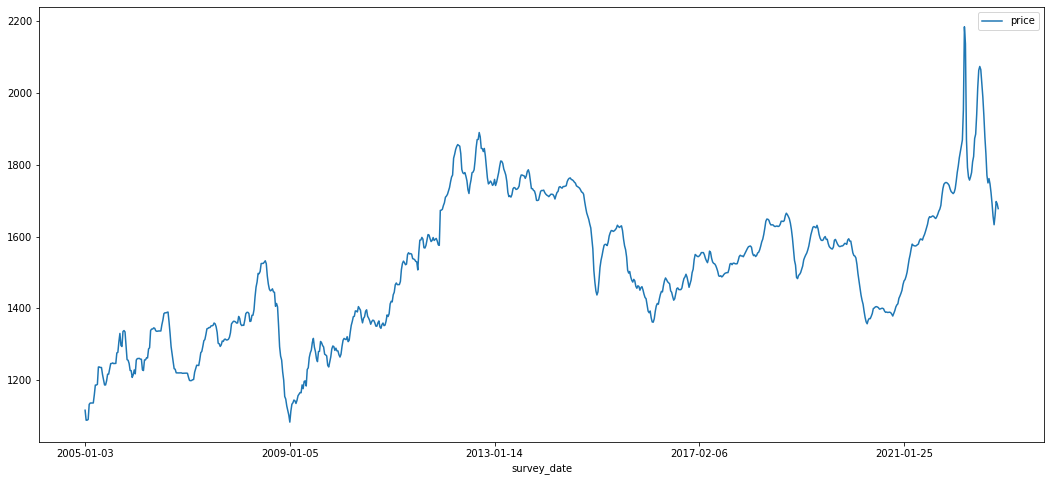

In [2]:
df = pd.read_csv("datasets/weekly_fuel_prices_all_data_from_2005_to_20221102.csv", index_col=0)
df = df.sort_values(by="survey_date")
matplotlib.rcParams['figure.figsize'] = [18,8]
df=df.groupby('product_name')['price'].get_group('Euro-Super 95')
df.plot(legend=True)

## Log + diferenciando a 1 paso

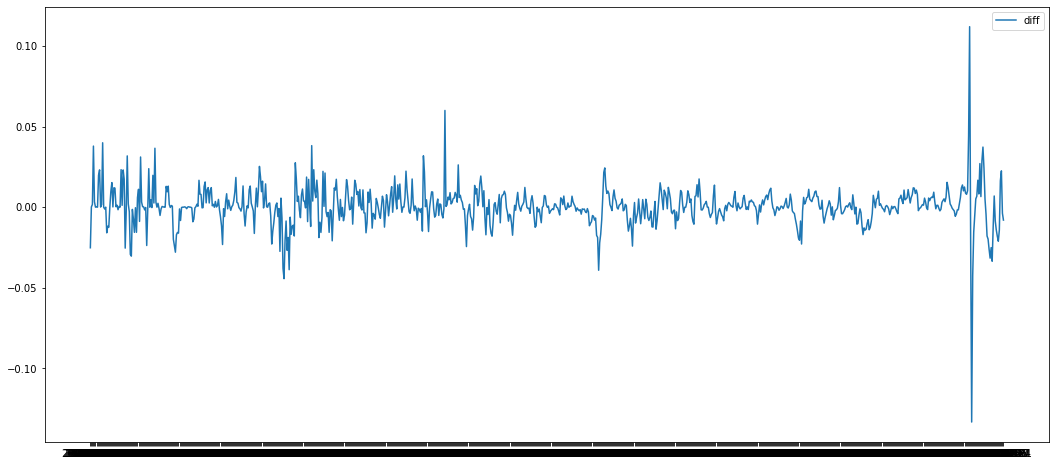

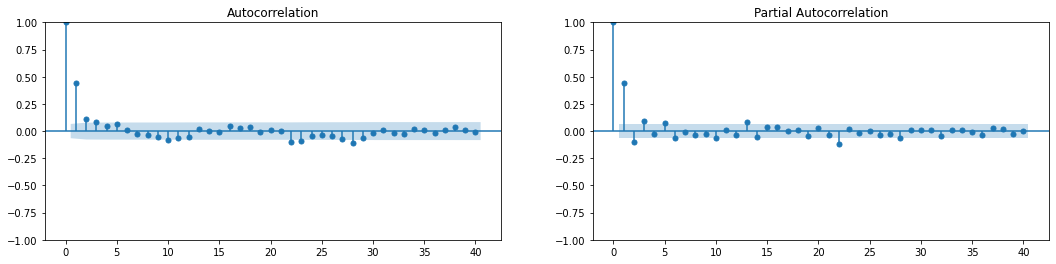

In [3]:
dataset = np.log(df)
diff = dataset.diff(1).dropna()

plt.plot(diff)
plt.legend(['diff'])
plt.show()

fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(diff, ax=ax[0], lags=40)
plot_pacf(diff, method='ywm', ax=ax[1], lags=40);

# Primer modelo propuesto:

* para la parte MA => q=1
* para la parte AR => p=2
* d=0
* D=1 porque diferencié una vez a 1 paso
* P=0
* Q=0 porque no veo componentes estacionales
* s=2 porque me lo solicita como mínimo SARIMAX si D=1

In [6]:
model = sm.tsa.statespace.SARIMAX(diff, order=(2,0,1), seasonal_order=(0,1,0,2))
fitted_model = model.fit(disp=False)
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                  892
Model:             SARIMAX(2, 0, 1)x(0, 1, [], 2)   Log Likelihood                2703.859
Date:                            Thu, 20 Apr 2023   AIC                          -5399.718
Time:                                    08:43:15   BIC                          -5380.553
Sample:                                         0   HQIC                         -5392.393
                                            - 892                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2718      0.012    -21.781      0.000      -0.296      -0.247
ar.L2         -0.3237      0.017    -19.549      0.000      -0.356      -0.291
ma.L1          0.9996      0.103      9.661      0.000       0.797       1.202
sigma2         0.0001   1.31e-05     10.180      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   2.27   Jarque-Bera (JB):             27021.88
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -1.44
Prob(H) (two-sided):                  0.97   Kurtosis:                        29.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

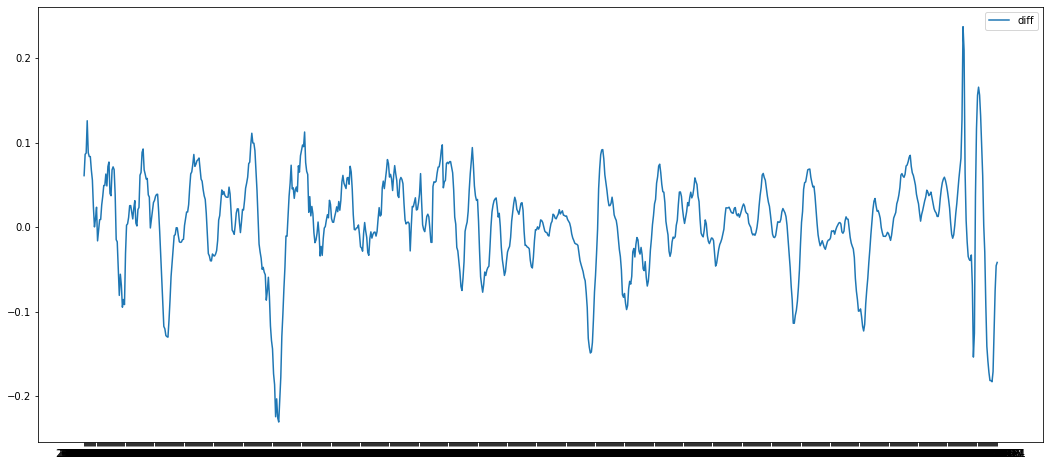

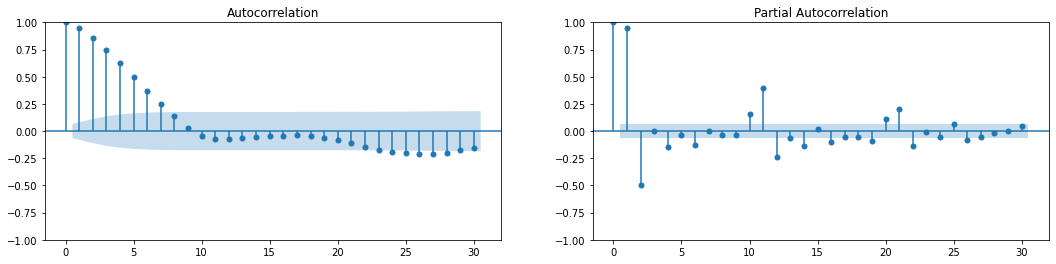

In [7]:
dataset = np.log(df)
diff = dataset.diff(10).dropna()

plt.plot(diff)
plt.legend(['diff'])
plt.show()

fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(diff, ax=ax[0])
plot_pacf(diff, method='ywm', ax=ax[1]);

In [13]:
model2 = sm.tsa.statespace.SARIMAX(np.log(df), order=(2,0,0), seasonal_order=(0,10,0,2))
fitted_model2 = model2.fit(disp=False)
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                  893
Model:             SARIMAX(2, 0, 0)x(0, 10, 0, 2)   Log Likelihood                 461.837
Date:                            Thu, 20 Apr 2023   AIC                           -917.674
Time:                                    09:36:45   BIC                           -903.359
Sample:                                         0   HQIC                          -912.198
                                            - 893                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7632      0.016     47.542      0.000       0.732       0.795
ar.L2         -0.9078      0.012    -72.872      0.000      -0.932      -0.883
sigma2      7.381e-06    1.9e-07     38.893      0.000    7.01e-06    7.75e-06
===================================================================================
Ljung-Box (L1) (Q):                 113.15   Jarque-Bera (JB):               999.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.26
Prob(H) (two-sided):                  0.21   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

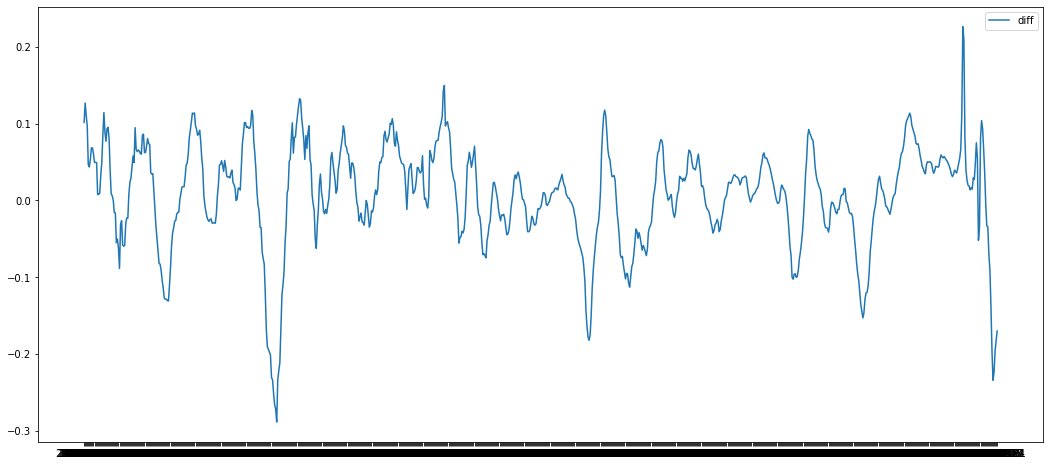

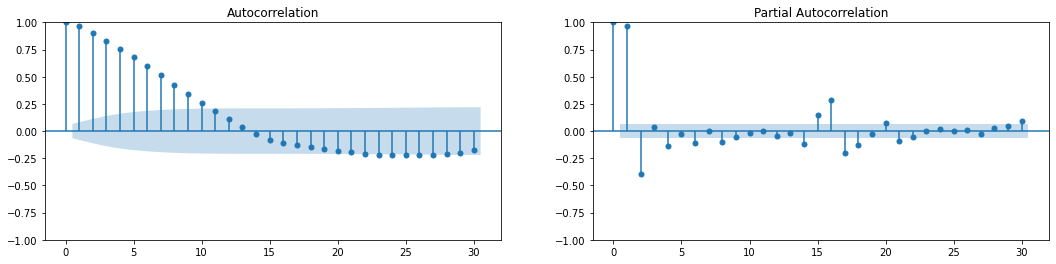

In [11]:
dataset = np.log(df)
diff = dataset.diff(15).dropna()

plt.plot(diff)
plt.legend(['diff'])
plt.show()

fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(diff, ax=ax[0])
plot_pacf(diff, method='ywm', ax=ax[1]);

In [17]:
model3 = sm.tsa.statespace.SARIMAX(np.log(df), order=(3,0,1), seasonal_order=(0,0,0,0))
fitted_model3 = model3.fit(disp=False)
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  893
Model:               SARIMAX(3, 0, 1)   Log Likelihood                2211.789
Date:                Thu, 20 Apr 2023   AIC                          -4413.579
Time:                        09:43:21   BIC                          -4389.606
Sample:                             0   HQIC                         -4404.417
                                - 893                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9922      0.019    -52.038      0.000      -1.030      -0.955
ar.L2          0.9948      0.016     62.304      0.000       0.964       1.026
ar.L3          0.9974      0.006    158.965      0.000       0.985       1.010
ma.L1          0.9998      0.342      2.921      0.003       0.329       1.671
sigma2         0.0004      0.000      2.967      0.003       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                 430.43   Jarque-Bera (JB):              8858.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Analisis de Residuos

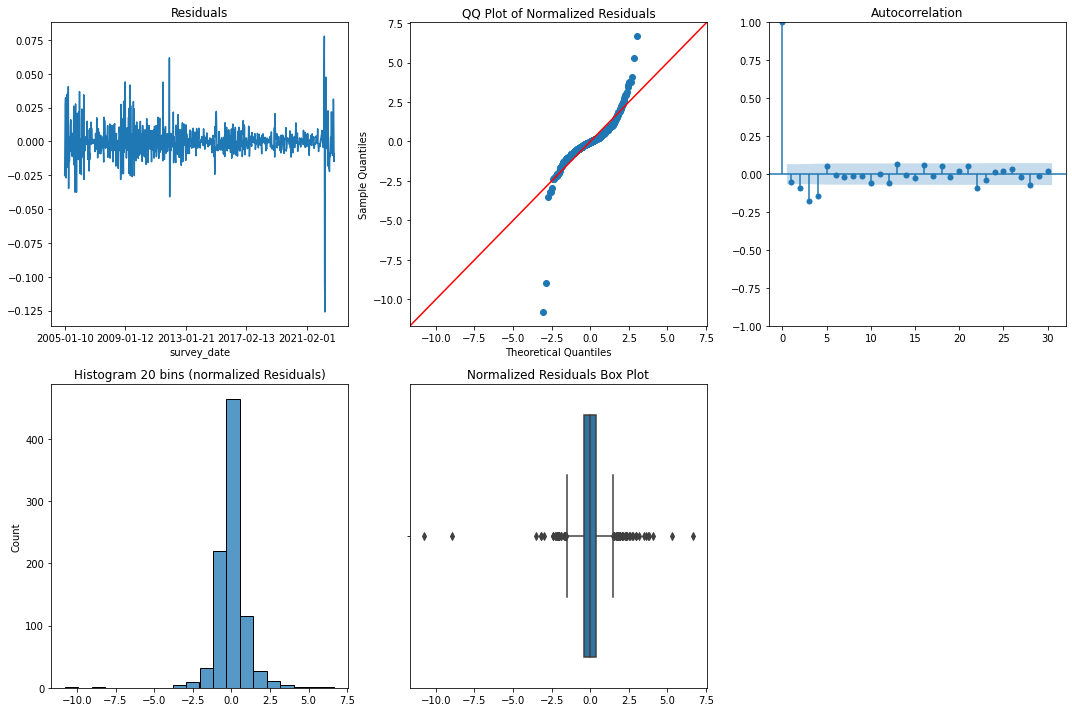

In [18]:
resid = fitted_model.resid
resid_norm = (resid-resid.mean())/resid.std()
bins=20

#Plot
fig, ax = plt.subplots(2,3,figsize=(15,10))
resid.plot(ax=ax[0,0])
ax[0,0].set_title('Residuals')
sm.qqplot(resid_norm, scale=1, line="45", ax=ax[0,1])
ax[0,1].set_title('QQ Plot of Normalized Residuals')
sm.graphics.tsa.plot_acf(resid, ax=ax[0,2])
sns.histplot(resid_norm, bins=bins, ax=ax[1,0])
ax[1,0].set_title(f'Histogram {bins} bins (normalized Residuals)')
sns.boxplot(resid_norm, ax=ax[1,1])
ax[1,1].set_title('Normalized Residuals Box Plot')
plt.delaxes(ax[1][2])
plt.tight_layout()
plt.show()

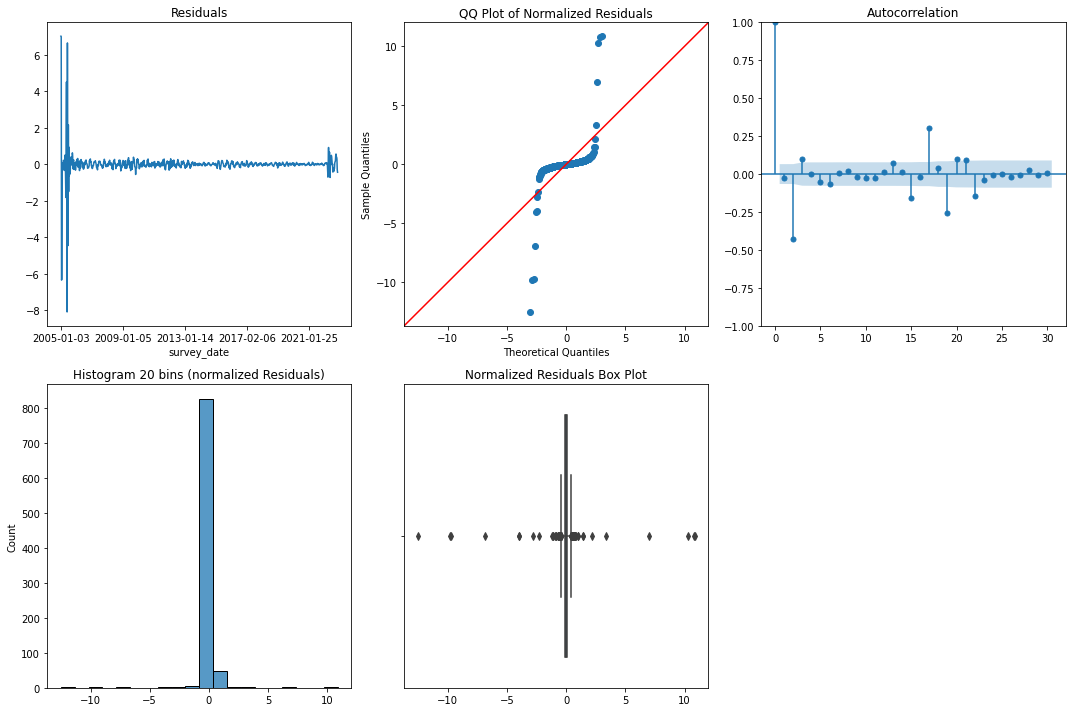

In [19]:
resid = fitted_model2.resid
resid_norm = (resid-resid.mean())/resid.std()
bins=20

#Plot
fig, ax = plt.subplots(2,3,figsize=(15,10))
resid.plot(ax=ax[0,0])
ax[0,0].set_title('Residuals')
sm.qqplot(resid_norm, scale=1, line="45", ax=ax[0,1])
ax[0,1].set_title('QQ Plot of Normalized Residuals')
sm.graphics.tsa.plot_acf(resid, ax=ax[0,2])
sns.histplot(resid_norm, bins=bins, ax=ax[1,0])
ax[1,0].set_title(f'Histogram {bins} bins (normalized Residuals)')
sns.boxplot(resid_norm, ax=ax[1,1])
ax[1,1].set_title('Normalized Residuals Box Plot')
plt.delaxes(ax[1][2])
plt.tight_layout()
plt.show()

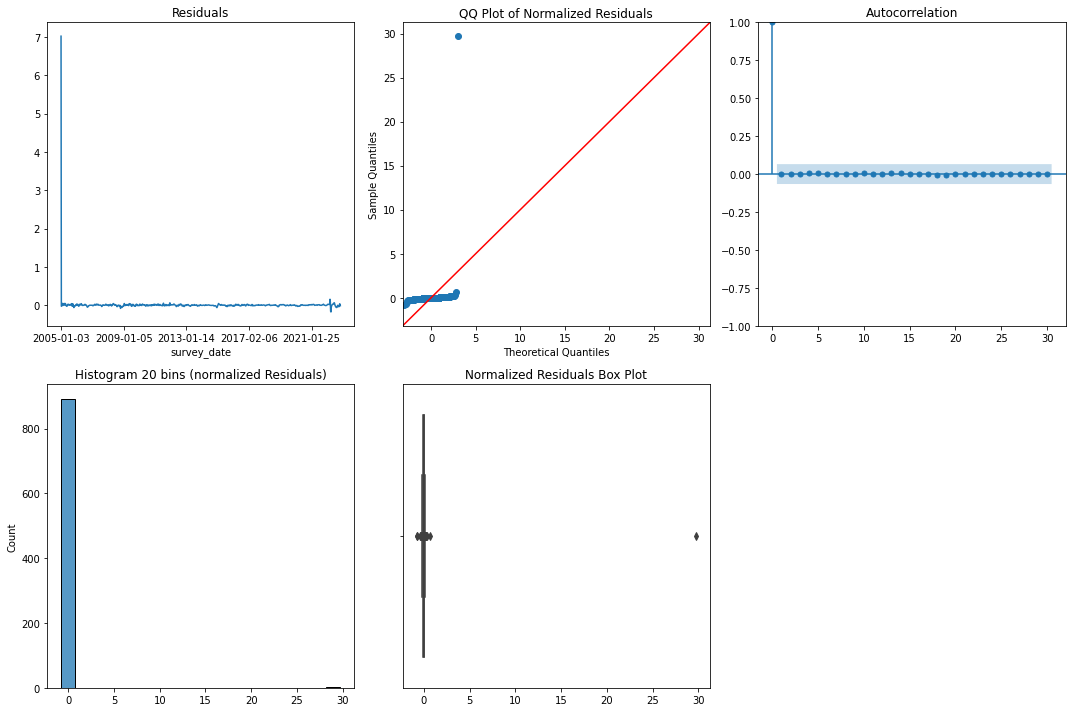

In [20]:
resid = fitted_model3.resid
resid_norm = (resid-resid.mean())/resid.std()
bins=20

#Plot
fig, ax = plt.subplots(2,3,figsize=(15,10))
resid.plot(ax=ax[0,0])
ax[0,0].set_title('Residuals')
sm.qqplot(resid_norm, scale=1, line="45", ax=ax[0,1])
ax[0,1].set_title('QQ Plot of Normalized Residuals')
sm.graphics.tsa.plot_acf(resid, ax=ax[0,2])
sns.histplot(resid_norm, bins=bins, ax=ax[1,0])
ax[1,0].set_title(f'Histogram {bins} bins (normalized Residuals)')
sns.boxplot(resid_norm, ax=ax[1,1])
ax[1,1].set_title('Normalized Residuals Box Plot')
plt.delaxes(ax[1][2])
plt.tight_layout()
plt.show()

# Predicciones

In [27]:
original_data = np.log(df)
original_data = original_data.reset_index()
original_data["survey_date"] = pd.to_datetime(original_data["survey_date"])
original_data.set_index("survey_date")

,price
survey_date,
2005-01-03,7.017282
2005-01-10,6.992096
2005-01-17,6.992225
2005-01-24,6.993942
2005-01-31,7.031838
...,...
2022-10-03,7.398058
2022-10-10,7.414440
2022-10-17,7.436965


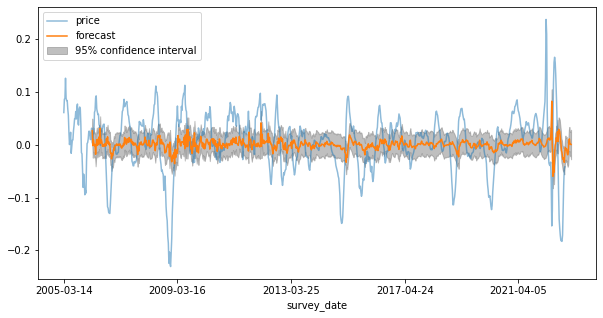

In [40]:
original_data = np.log(df)
diff_plot = original_data.diff(10).dropna()
fig, ax = plt.subplots(figsize=[10,5])
ax = diff_plot.plot(ax=ax, alpha=0.5)
fig = plot_predict(fitted_model, start=50, end=893, ax=ax, plot_insample=False)

plt.show()

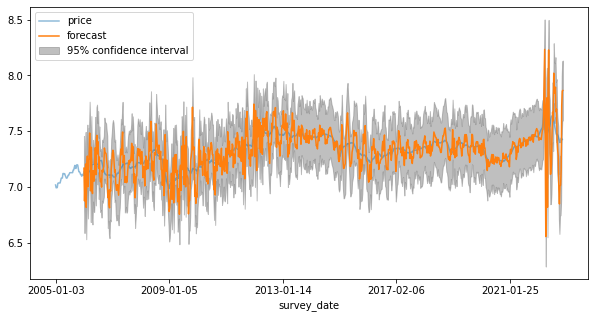

In [34]:
original_data = np.log(df)
fig, ax = plt.subplots(figsize=[10,5])
ax = original_data.plot(ax=ax, alpha=0.5)
fig = plot_predict(fitted_model2, start=50, end=893, ax=ax, plot_insample=False)

plt.show()

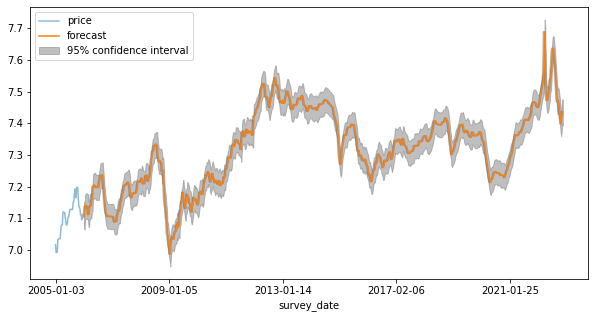

In [38]:
original_data = np.log(df)
fig, ax = plt.subplots(figsize=[10,5])
ax = original_data.plot(ax=ax, alpha=0.5)
fig = plot_predict(fitted_model3, start=50, end=893, ax=ax, plot_insample=False)

plt.show()